In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from matplotlib import cm

%matplotlib widget

plt.rcParams['figure.figsize'] = [10,10]

# (b)(I) Reformat the imported lists of prices to an appropriate two-dimensional matrix form. Then plot the two surfaces c(t,K)

We read the data from the first .csv file, and assign the relevant headers for context of each column. From the newly created dataframe, each column is stored as a series in t_1, k_1 and c_1 respectively.

In [2]:
df_new_option_prices_1 = pd.read_csv('./New_option_prices_1.csv', names=['Time to maturity', 'Strike price', 'Call option price'])

t_1 = df_new_option_prices_1['Time to maturity']
k_1 = df_new_option_prices_1['Strike price']
c_1 = df_new_option_prices_1['Call option price']

We reformat the data into a 2-dimensional matrix form as indicated in the question, such that each row of array contains the corresponding time to maturity, strike price and call option prices.

In [3]:
# REFORMAT TO 2-DIMENSIONAL MATRIX FORM
option_prices_1 = np.column_stack([t_1, k_1, c_1])
option_prices_1[:10]

array([[2.4658e-02, 1.5500e+03, 4.5188e+01],
       [2.4658e-02, 1.5600e+03, 3.7096e+01],
       [2.4658e-02, 1.5700e+03, 2.9562e+01],
       [2.4658e-02, 1.5800e+03, 2.2739e+01],
       [2.4658e-02, 1.5900e+03, 1.6771e+01],
       [2.4658e-02, 1.6000e+03, 1.1770e+01],
       [2.4658e-02, 1.6100e+03, 7.7927e+00],
       [2.4658e-02, 1.6200e+03, 4.8206e+00],
       [2.4658e-02, 1.6300e+03, 2.7572e+00],
       [2.4658e-02, 1.6400e+03, 1.4419e+00]])

We create a scatter plot projected in a 3-dimensional space using the data above, from its 2-dimensional matrix form. We subsequently create a triangular surface plot based on the data points in the graph, and used a color gradient to visually enhance the surface features.

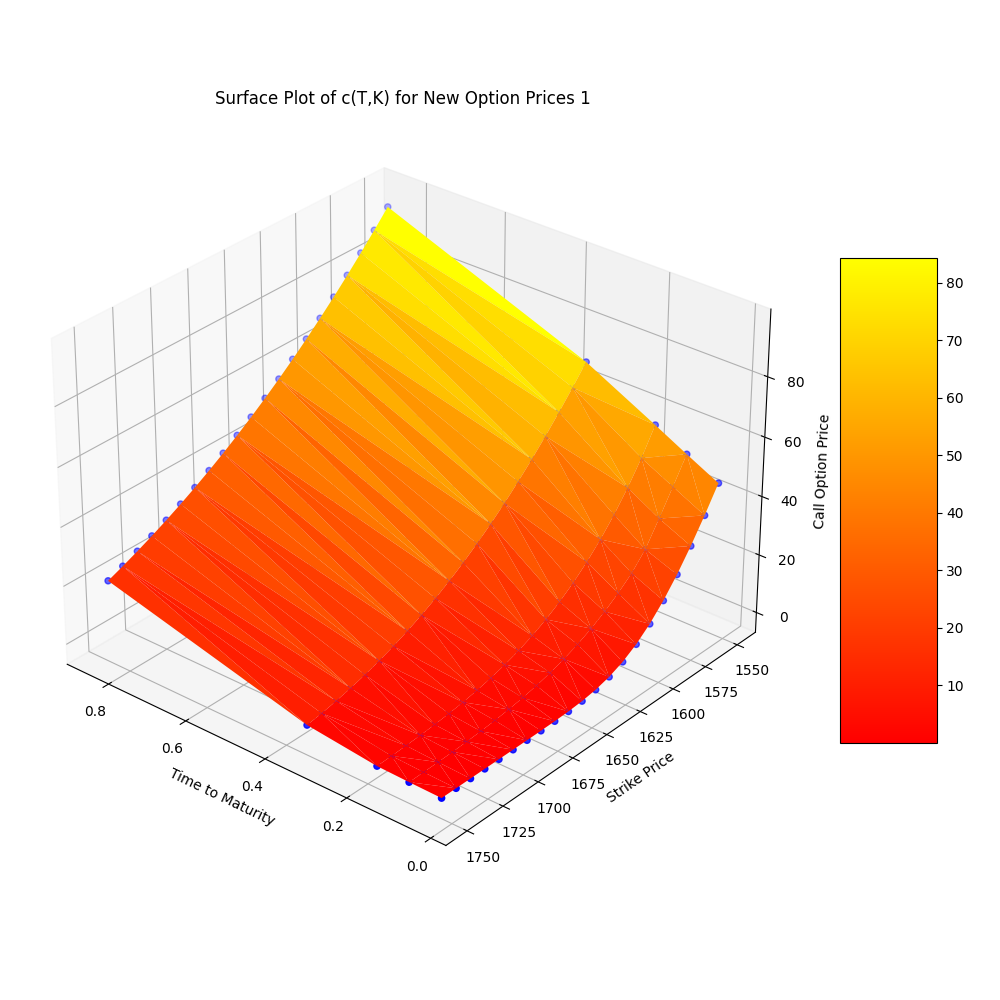

In [4]:
T_1 = option_prices_1[:, 0]
K_1 = option_prices_1[:, 1]
c_TK_1 = option_prices_1[:, 2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(T_1, K_1, c_TK_1, c = 'b', marker='o')
trisurf = ax.plot_trisurf(T_1, K_1, c_TK_1, linewidth = 0.2, antialiased = True, cmap=cm.autumn)
fig.colorbar(trisurf, ax = ax, shrink = 0.5, aspect = 5)

ax.set_xlabel('Time to Maturity')
ax.set_ylabel('Strike Price')
ax.set_zlabel('Call Option Price')

plt.title('Surface Plot of c(T,K) for New Option Prices 1')
ax.view_init(30, 130)
plt.tight_layout()
plt.show()

For the second surface plot, we perform the same exact steps with data from the second .csv file.

In [5]:
df_new_option_prices_2 = pd.read_csv('./New_option_prices_2.csv', names=['Time to maturity', 'Strike price', 'Call option price'])

t_2 = df_new_option_prices_2['Time to maturity']
k_2 = df_new_option_prices_2['Strike price']
c_2 = df_new_option_prices_2['Call option price']

In [6]:
# REFORMAT TO 2-DIMENSIONAL MATRIX FORM
option_prices_2 = np.column_stack([t_2, k_2, c_2])
option_prices_2[:10]

array([[2.1918e-02, 1.5500e+03, 7.4677e+01],
       [2.1918e-02, 1.5600e+03, 6.4823e+01],
       [2.1918e-02, 1.5700e+03, 5.5156e+01],
       [2.1918e-02, 1.5800e+03, 4.5785e+01],
       [2.1918e-02, 1.5900e+03, 3.6881e+01],
       [2.1918e-02, 1.6000e+03, 2.8662e+01],
       [2.1918e-02, 1.6100e+03, 2.1357e+01],
       [2.1918e-02, 1.6200e+03, 1.5167e+01],
       [2.1918e-02, 1.6300e+03, 1.0205e+01],
       [2.1918e-02, 1.6400e+03, 6.4715e+00]])

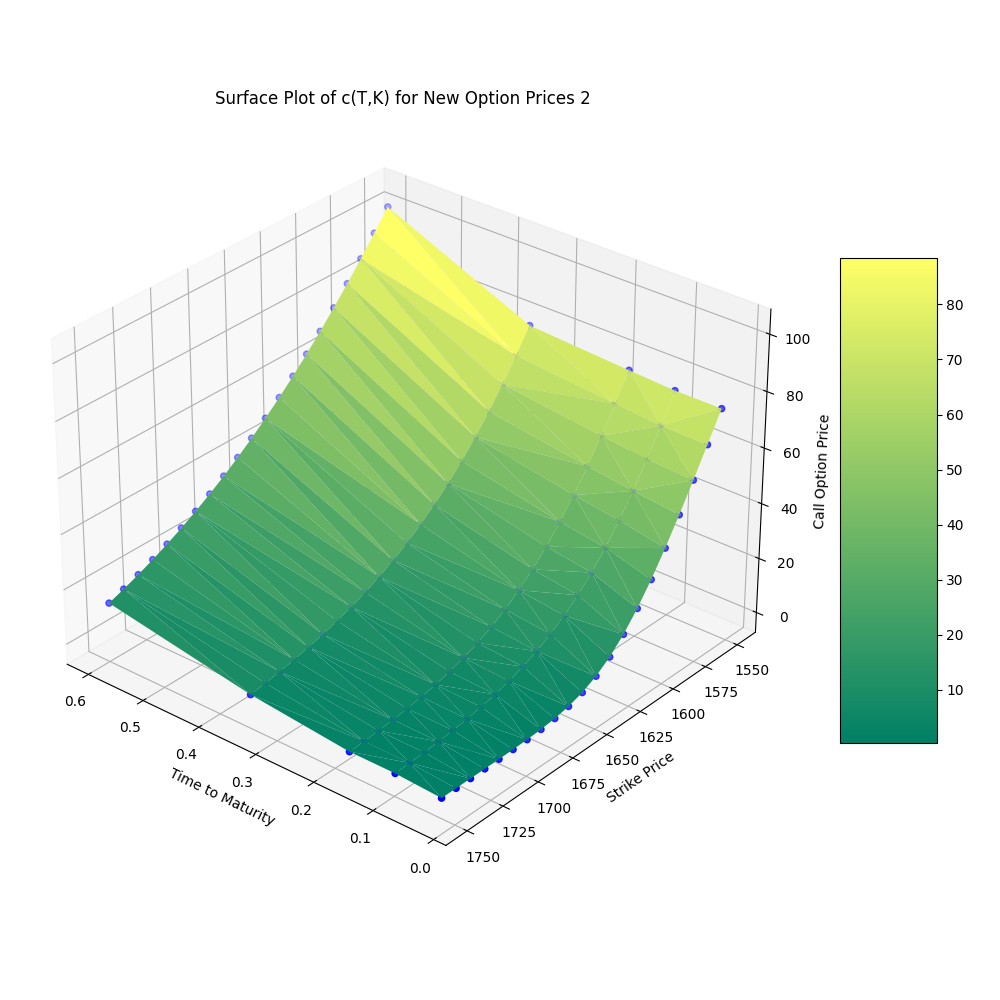

In [7]:
T_2 = option_prices_2[:, 0]
K_2 = option_prices_2[:, 1]
c_TK_2 = option_prices_2[:, 2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(T_2, K_2, c_TK_2, c = 'b', marker='o')
trisurf = ax.plot_trisurf(T_2, K_2, c_TK_2, linewidth = 0.2, antialiased = True, cmap=cm.summer)
fig.colorbar(trisurf, ax = ax, shrink = 0.5, aspect = 5)

ax.set_xlabel('Time to Maturity')
ax.set_ylabel('Strike Price')
ax.set_zlabel('Call Option Price')

plt.title('Surface Plot of c(T,K) for New Option Prices 2')
ax.view_init(30, 130)
plt.tight_layout()
plt.show()

In the code below, we combine both surface plots into the same graph for a better visualization of differences between them.

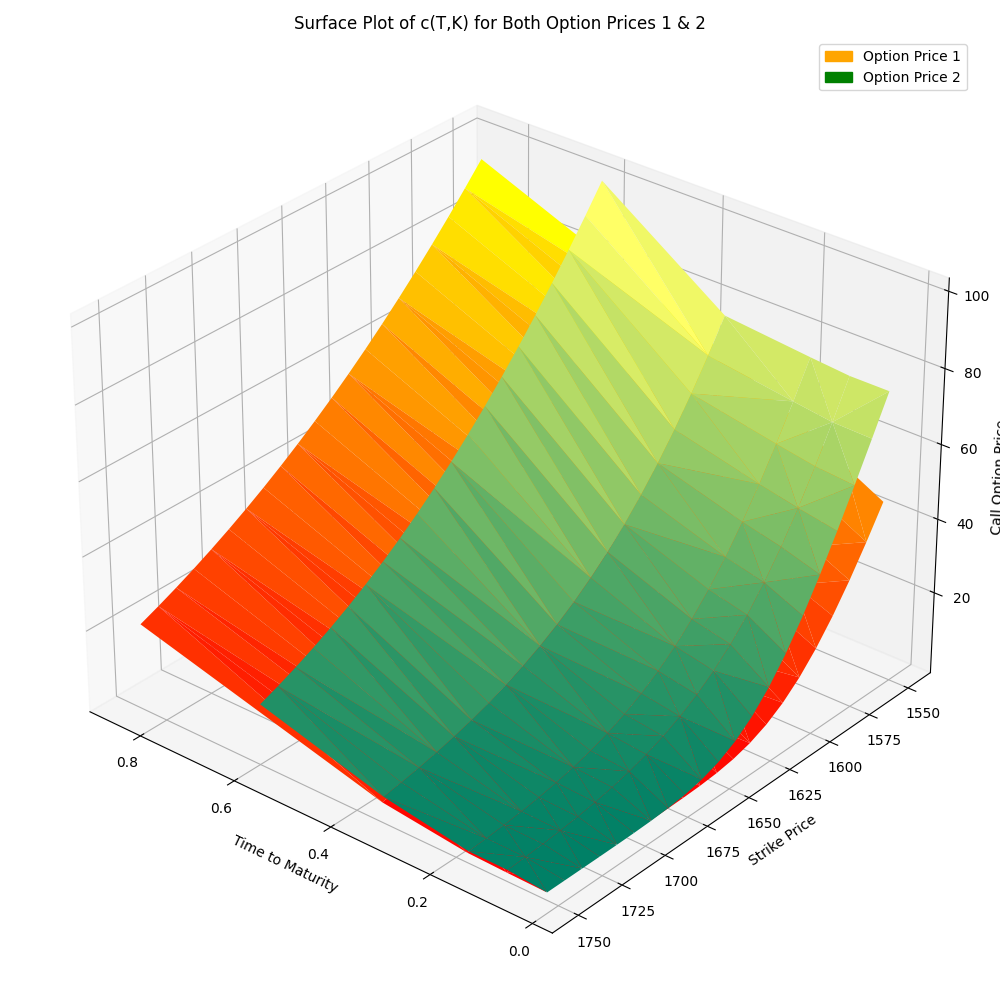

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
trisurf_1 = ax.plot_trisurf(T_1, K_1, c_TK_1, linewidth = 0.2, antialiased = True, cmap=cm.autumn, label='Option Price 1')
trisurf_2 = ax.plot_trisurf(T_2, K_2, c_TK_2, linewidth = 0.2, antialiased = True, cmap=cm.summer, label='Option Price 2')

ax.set_xlabel('Time to Maturity')
ax.set_ylabel('Strike Price')
ax.set_zlabel('Call Option Price')

plt.title('Surface Plot of c(T,K) for Both Option Prices 1 & 2')
ax.view_init(30, 130)
legend_1 = mpatches.Patch(color='orange', label='Option Price 1')
legend_2 = mpatches.Patch(color='green', label='Option Price 2')

plt.legend(handles=[legend_1, legend_2])
plt.tight_layout()
plt.show()

# (b)(II) Let r = 0 and approximate the required derivatives in the Dupire formula using finite differences. Then compute and plot the two local volatility surfaces. Tip: use vectorized operations and try to avoid loops where possible.

Given that the Dupire's formula is $\sigma(T,K) = {\sqrt{\frac{2}{K^2}{\frac{\frac{\partial c(T,K)}{\partial T} + rK\frac{\partial c}{\partial K}}{\frac{\partial^2 c}{\partial K^2}}}}}$,

When r = 0, the term with r disappears and we will have $\sigma(T,K) = {\sqrt{\frac{2}{K^2}{\frac{\frac{\partial c(T,K)}{\partial T}}{\frac{\partial^2 c}{\partial K^2}}}}}$

We approximate with finite differences using the Central Difference, which is shown below:
#### Central Difference
$\frac {\partial c(T,K)}{\partial T} \approx \frac{c(T + h_1, K) - c(T - h_2, K)}{h_1 + h_2}$ and $\frac {\partial c(T,K)}{\partial K} \approx \frac{c(T, K + h_1 ) - c(T,K - h_2)}{h_1 + h_2}$

We will now apply the approximate finite differences to the given datasets. We will use Central Difference for our calculations for better approximation.

The Central Difference
$\frac {\partial c(T,K)}{\partial T} \approx \frac{c(T + h_1, K) - c(T - h_2, K)}{h_1 + h_2}$

In [9]:
df_new_option_prices_1['dt_central'] = pd.DataFrame(df_new_option_prices_1, columns=['Time to maturity', 'Strike price', 'Call option price']).groupby('Strike price').apply(lambda x: (x['Call option price'].diff(1) - x['Call option price'].diff(-1))/((x['Time to maturity'] - x['Time to maturity'].diff(-1)) + x['Time to maturity'].diff(1)-x['Time to maturity'])).reset_index(level=0)[0]

df_new_option_prices_1['dk2'] = pd.DataFrame(df_new_option_prices_1, columns=['Time to maturity', 'Strike price', 'Call option price']).groupby('Time to maturity').apply(lambda x: (x['Call option price'].shift(1) - 2*x['Call option price'] + x['Call option price'].shift(-1))/(((x['Strike price'] - x['Strike price'].diff(-1)) + (x['Strike price'].diff(1) - x['Strike price']))/2)**2).reset_index(level=0)[0]

df_new_option_prices_1['iv'] = np.sqrt(2*df_new_option_prices_1['dt_central']/(df_new_option_prices_1['Strike price']**2 *df_new_option_prices_1['dk2']))


In [10]:
df_new_option_prices_2['dt_central'] = pd.DataFrame(df_new_option_prices_2, columns=['Time to maturity', 'Strike price', 'Call option price']).groupby('Strike price').apply(lambda x: (x['Call option price'].diff(1) - x['Call option price'].diff(-1))/((x['Time to maturity'] - x['Time to maturity'].diff(-1)) + x['Time to maturity'].diff(1)-x['Time to maturity'])).reset_index(level=0)[0]

df_new_option_prices_2['dk2'] = pd.DataFrame(df_new_option_prices_2, columns=['Time to maturity', 'Strike price', 'Call option price']).groupby('Time to maturity').apply(lambda x: (x['Call option price'].shift(1) - 2*x['Call option price'] + x['Call option price'].shift(-1))/(((x['Strike price'] - x['Strike price'].diff(-1)) + (x['Strike price'].diff(1) - x['Strike price']))/2)**2).reset_index(level=0)[0]

df_new_option_prices_2['iv'] = np.sqrt(2 * df_new_option_prices_2['dt_central']/(df_new_option_prices_2['Strike price']**2 * df_new_option_prices_2['dk2']))


We plot the local volatility surfaces of the corresponding option price datasets based on the approximate finite differences.

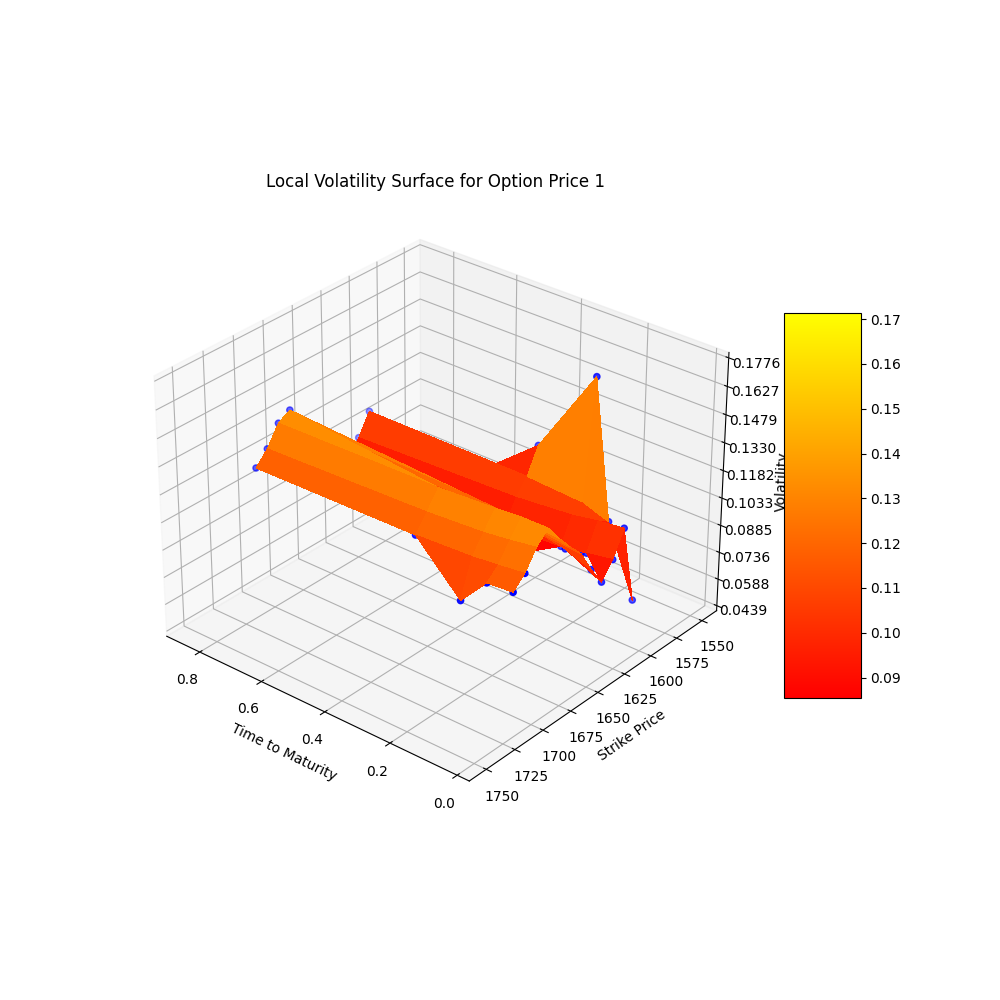

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = df_new_option_prices_1['Time to maturity'].unique()
Y = df_new_option_prices_1['Strike price'].unique()
X, Y = np.meshgrid(X, Y)
Z = df_new_option_prices_1['iv'].values.reshape(len(X), -1)

ax.scatter(X, Y, Z, c = 'b', marker='o')
surf = ax.plot_surface(X, Y, Z, cmap=cm.autumn, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(ticker.LinearLocator(10))

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('Time to Maturity')
ax.set_ylabel('Strike Price')
ax.set_zlabel('Volatility')

plt.title('Local Volatility Surface for Option Price 1')
ax.view_init(30, 130)

plt.show()

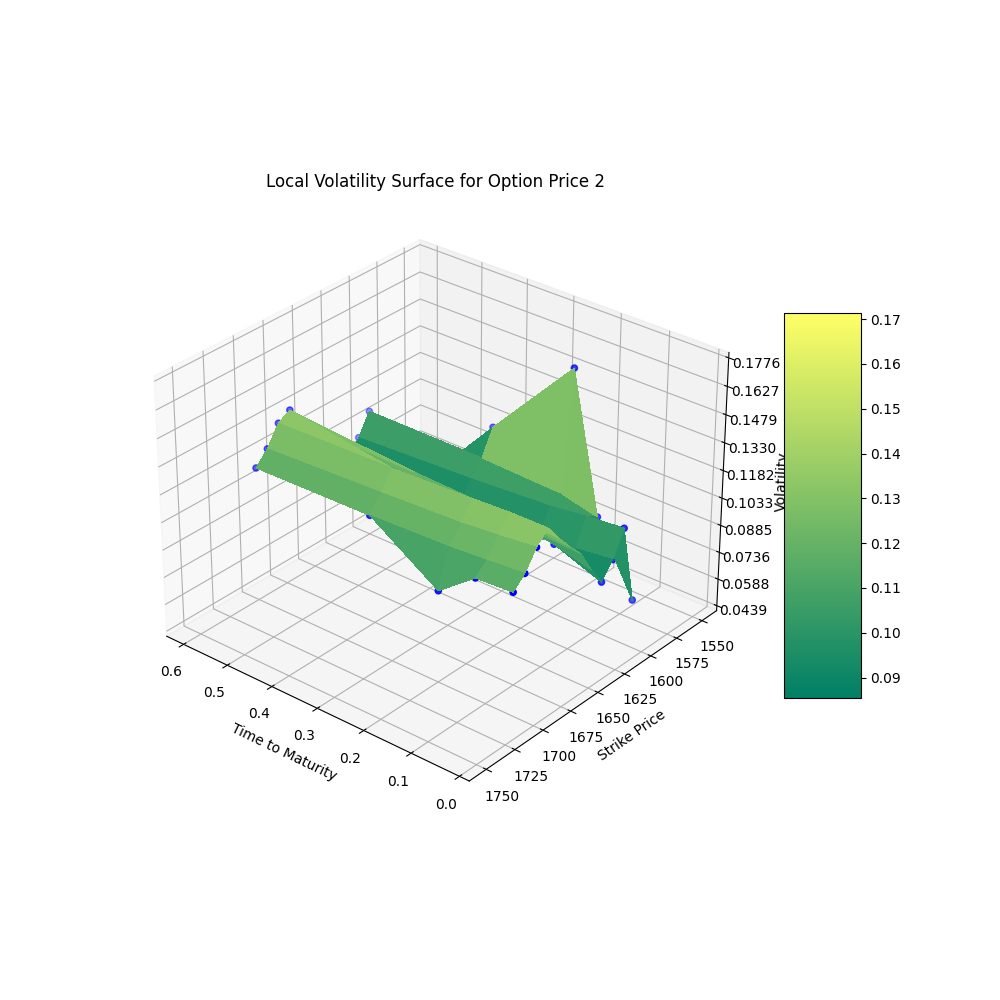

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = df_new_option_prices_2['Time to maturity'].unique()
Y = df_new_option_prices_2['Strike price'].unique()
X, Y = np.meshgrid(X, Y)
Z = df_new_option_prices_1['iv'].values.reshape(len(X), -1)

ax.scatter(X, Y, Z, c = 'b', marker='o')
surf = ax.plot_surface(X, Y, Z, cmap=cm.summer, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(ticker.LinearLocator(10))

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('Time to Maturity')
ax.set_ylabel('Strike Price')
ax.set_zlabel('Volatility')

plt.title('Local Volatility Surface for Option Price 2')
ax.view_init(30, 130)

plt.show()

In [13]:
df_increased_option_prices_2 = pd.DataFrame(df_new_option_prices_2, columns=['Time to maturity', 'Strike price', 'Call option price'])
df_increased_option_prices_2.head()


,Time to maturity,Strike price,Call option price
0,0.021918,1550,74.677
1,0.021918,1560,64.823
2,0.021918,1570,55.156
3,0.021918,1580,45.785
4,0.021918,1590,36.881


In [14]:
df_increased_option_prices_2 = pd.DataFrame(df_new_option_prices_2, columns=['Time to maturity', 'Strike price', 'Call option price'])
df_increased_option_prices_2['Call option price'] = df_increased_option_prices_2['Call option price'] * 1.1
df_increased_option_prices_2.head()


,Time to maturity,Strike price,Call option price
0,0.021918,1550,82.1447
1,0.021918,1560,71.3053
2,0.021918,1570,60.6716
3,0.021918,1580,50.3635
4,0.021918,1590,40.5691


In [15]:
df_increased_option_prices_2['dt_central'] = df_increased_option_prices_2.groupby('Strike price').apply(lambda x: (x['Call option price'].diff(1) - x['Call option price'].diff(-1))/((x['Time to maturity'] - x['Time to maturity'].diff(-1)) + x['Time to maturity'].diff(1)-x['Time to maturity'])).reset_index(level=0)[0]

df_increased_option_prices_2['dk2'] = pd.DataFrame(df_increased_option_prices_2, columns=['Time to maturity', 'Strike price', 'Call option price']).groupby('Time to maturity').apply(lambda x: (x['Call option price'].shift(1) - 2*x['Call option price'] + x['Call option price'].shift(-1))/(((x['Strike price'] - x['Strike price'].diff(-1)) + (x['Strike price'].diff(1) - x['Strike price']))/2)**2).reset_index(level=0)[0]

df_increased_option_prices_2['iv'] = np.sqrt(2 * df_increased_option_prices_2['dt_central']/(df_increased_option_prices_2['Strike price']**2 * df_increased_option_prices_2['dk2']))


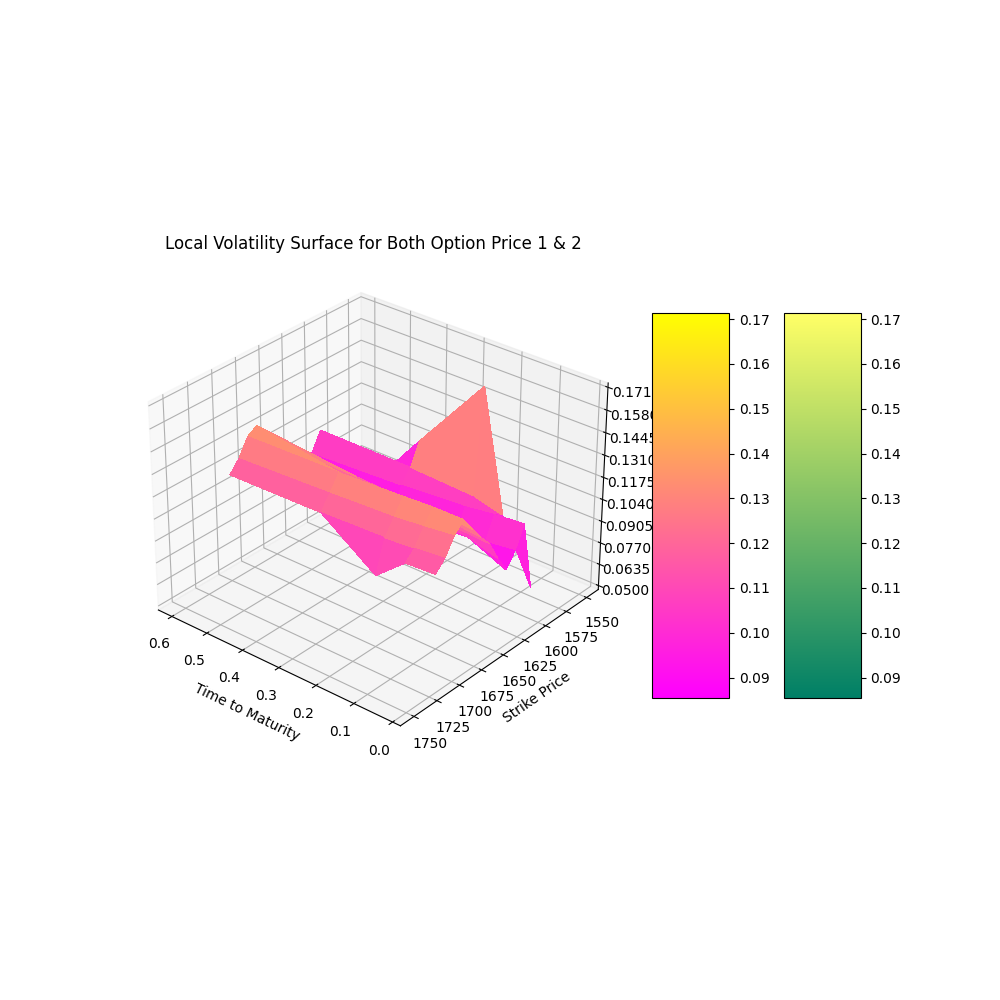

In [17]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X_2 = df_increased_option_prices_2['Time to maturity'].unique()
Y_2 = df_increased_option_prices_2['Strike price'].unique()
X_2, Y_2 = np.meshgrid(X_2, Y_2)
Z_2 = df_new_option_prices_1['iv'].values.reshape(len(X_2), -1)

surf_1 = ax.plot_surface(X, Y, Z, cmap=cm.summer, linewidth=0, antialiased=False)
surf_2 = ax.plot_surface(X_2, Y_2, Z_2, cmap=cm.spring, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(ticker.LinearLocator(10))

fig.colorbar(surf_1, shrink=0.5, aspect=5)
fig.colorbar(surf_2, shrink=0.5, aspect=5)

ax.set_xlabel('Time to Maturity')
ax.set_ylabel('Strike Price')
ax.set_zlabel('Volatility')

plt.title('Local Volatility Surface for Both Option Price 1 & 2')
ax.view_init(30, 130)

plt.show()